In [ ]:
# pip install --upgrade git+https://github.com/hyk2202/helper.git

import pandas as pd
from helper.util import *
from helper.analysis import *
from helper.tensor import *
from helper.plot import *
from helper.timeserise import *
from helper.core import *
from helper.classification import *
from helper.re import *
from helper.regression import *

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hyk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
origin = my_read_data('데이터_전처리_최종.xlsx',info=False, index_col='IDX')

In [ ]:
df = origin.copy()
df.columns

Index(['발생날짜', '요일', '공휴일여부', '오전오후', '시간대', '시간', '사고인지 시간', '공공/민간 구분', '날씨',
       '기온', '습도', '인적사고', '보호(방호)조치여부 - 안전방호', '보호(방호)조치여부 - 개인방호', '공종_대분류',
       '공종_중분류', '사고객체_대분류', '사고객체_중분류', '작업프로세스', '장소_대분류', '장소_중분류',
       '부위_대분류', '부위_중분류', '사고원인_주원인', '사상자수', '사고신고사유_부상', '사고신고사유_사망',
       '사고신고사유_물적', '시', '전체공사비', '전체공사비_분류', '해당공종_공사비', '구체적 사고원인',
       '사고발생후 조치사항', '공사기간_시작일', '공사기간_종료일', '공종_시작일', '공종_종료일', '재발방지대책',
       '공정률', '안전관리계획', '설계안전성검토', '작업자수', '지점 번호', '관측소', '기온.1', '강수량', '풍속',
       '풍향', '습도.1', '증기압', '이슬점온도', '현지기압', '해면기압', '일조', '전운량', '중하층운량',
       '시정', '지면온도'],
      dtype='object')

In [ ]:
df.drop(['발생날짜','지점 번호','관측소'],axis=1,inplace=True)

In [ ]:
temp = []
for i in df['인적사고']:
    if i == '기타':temp.append('분류불능')
    elif i == '없음':temp.append(None)
    else:temp.append(i)

df['인적사고'] = temp
df['인적사고'].value_counts()

넘어짐       5814
떨어짐       4321
물체에 맞음    3509
끼임        2576
분류불능      2152
부딪힘       1850
절단, 베임    1688
깔림         521
질병         381
찔림         307
화상         186
교통사고       123
감전          48
질식          18
Name: 인적사고, dtype: int64

In [ ]:
temp =[]
for i in df['강수량']:
    if i>=0.1 : temp.append(1)
    else:temp.append(0)


In [ ]:
# 결측치 : 0 정규작업 :1 그외: 2

temp = []
for i in df['사고인지 시간'].fillna(0):
    if i == 0 : temp.append(0)
    elif i == '정규작업 ': temp.append(1)
    else:temp.append(2)

df['사고인지 시간'] = temp
df['사고인지 시간'].value_counts()

1    18032
0     3167
2     2523
Name: 사고인지 시간, dtype: int64

In [ ]:
# 결측치 : 0, 조치/해당없음:1, 비조치:2

temp = []
for i in df["보호(방호)조치여부 - 안전방호"].fillna(0):
    if i == 0 :temp.append(0)
    elif i == '비조치': temp.append(2)
    else:temp.append(1)
df["보호(방호)조치여부 - 안전방호"] =temp


df["보호(방호)조치여부 - 안전방호"].value_counts()

1    17153
0     5411
2     1158
Name: 보호(방호)조치여부 - 안전방호, dtype: int64

In [ ]:
# 결측치 : 0, 조치/해당없음:1, 비조치:2

temp = []
for i in df["보호(방호)조치여부 - 개인방호"].fillna(0):
    if i == 0 :temp.append(0)
    elif i == '비조치': temp.append(2)
    else:temp.append(1)
df["보호(방호)조치여부 - 개인방호"] =temp


df["보호(방호)조치여부 - 개인방호"].value_counts()

1    17455
0     5410
2      857
Name: 보호(방호)조치여부 - 개인방호, dtype: int64

In [ ]:
# 통신설비, 산업설비, 전기설비 => 기타
temp = []
for i in df['공종_대분류']:
    if i in ['통신설비','산업설비','전기설비']:temp.append('기타')
    else:temp.append(i)
df['공종_대분류'] =temp

In [ ]:
# 비조치 :2 , 조치,해당없음 : 1 ,결측치 : 0
temp = []
for i in origin["작업프로세스"]:
    if i == '비조치': temp.append(2)
    elif i ==0:temp.append(1)
    else:temp.append(0)

In [ ]:
#노동부고시 제2002-8호, 『화학물질 및 물리적인자의 노출기준』 중 <별표 4>의 고온의 노출기준
temp = []
for i in origin['지면온도']:
    if i <25.0: temp.append(0)
    elif i <25.9:temp.append(1)
    elif i<27.9:temp.append(2)
    elif i <30:temp.append(3)
    else:temp.append(4)
df['지면온도'] = temp

In [ ]:
df['전체공사비_분류'] = df['전체공사비_분류'].map({'2,000만 ~ 5억원 미만':2, '2,000만 미만':1, '50억원 이상':4, '5억 ~ 50억원 미만':3, '분류불능':0})
df['전체공사비_분류'].value_counts()

4    15759
2     3961
3     3654
1      228
0      120
Name: 전체공사비_분류, dtype: int64

In [ ]:
temp = []
for i in df['작업자수']:
    try:
        a = int(i[:3])
        if a == 100: temp.append(4)
        elif a == 300: temp.append(5)
        elif a == 500: temp.append(6)

    except:
        a = int(i[:2])
        if a ==19:temp.append(0)
        elif a == 20 :temp.append(1)
        elif a==50:temp.append(2)
df['작업자수'] = temp


In [ ]:
temp = []
for i in origin['공정률']:
    try:
        if '미만' in i : temp.append(0)
        elif '이상' in i: temp.append(9)
        else:
            temp.append(int(i[:1]))
    except:
        
        temp.append(0)

df['공정률'] = temp

In [ ]:
df.dtypes

    
fields=[]
for f in df.columns:
    if df[f].dtypes not in [
        "int",
        "int32",
        "int64",
        "float",
        "float32",
        "float64",
    ]:
        fields.append(f)

In [ ]:
cate = df[fields]
df2 = df.drop(fields,axis=1)

In [ ]:
df2 = my_replace_missing_value(df2,'constant',0)
cate = my_replace_missing_value(cate,'constant','0')

In [ ]:
df2.columns

Index(['시간대', '사고인지 시간', '습도', '보호(방호)조치여부 - 안전방호', '보호(방호)조치여부 - 개인방호',
       '사상자수', '전체공사비_분류', '공정률', '작업자수', '기온.1', '강수량', '풍속', '풍향', '습도.1',
       '증기압', '이슬점온도', '현지기압', '해면기압', '일조', '전운량', '중하층운량', '시정', '지면온도'],
      dtype='object')

In [ ]:
fields.remove('공사기간_시작일')
fields.remove('공사기간_종료일')
fields.remove('공종_시작일')
fields.remove('공종_종료일')
fields.remove('구체적 사고원인')
fields.remove('사고발생후 조치사항')
fields.remove('재발방지대책')

In [ ]:
drop_fields = ['시간대','습도','']

In [ ]:
df2.columns

Index(['시간대', '사고인지 시간', '습도', '보호(방호)조치여부 - 안전방호', '보호(방호)조치여부 - 개인방호',
       '사상자수', '전체공사비_분류', '공정률', '작업자수', '기온.1', '강수량', '풍속', '풍향', '습도.1',
       '증기압', '이슬점온도', '현지기압', '해면기압', '일조', '전운량', '중하층운량', '시정', '지면온도'],
      dtype='object')

In [ ]:
cate = cate[fields]

In [ ]:
drop_cols = ['기온', '습도', '구체적 사고원인', '사고발생후 조치사항', '재발방지대책', '공사기간_시작일', '공사기간_종료일', '공종_시작일',
             '공종_종료일', '관측소', '시간', '발생날짜', '지점 번호', '전체공사비_분류']

In [ ]:
drop_cols = [x for x in drop_cols if x in df2.columns]
drop_cols

['기온', '시간']

In [ ]:
df2 = df2.drop(drop_cols,axis=1)
df2[fields]=cate
df2.dtypes
# fields.remove('인적사고')


시간대                  float64
사고인지 시간              float64
보호(방호)조치여부 - 안전방호    float64
보호(방호)조치여부 - 개인방호    float64
사상자수                 float64
공정률                  float64
작업자수                 float64
기온.1                 float64
강수량                  float64
풍속                   float64
풍향                   float64
습도.1                 float64
증기압                  float64
이슬점온도                float64
현지기압                 float64
해면기압                 float64
일조                   float64
전운량                  float64
중하층운량                float64
시정                   float64
지면온도                 float64
요일                    object
공휴일여부                 object
오전오후                  object
공공/민간 구분              object
날씨                    object
인적사고                  object
공종_대분류                object
공종_중분류                object
사고객체_대분류              object
사고객체_중분류              object
작업프로세스                object
장소_대분류                object
장소_중분류                object
부위_대분류        

In [ ]:
df2 = df2.dropna()

In [ ]:
df2 = df2[df2['인적사고'] != '0'].dropna()

In [ ]:
fields = [x for x in fields if x in df2.columns]
fields

['요일',
 '공휴일여부',
 '오전오후',
 '시간',
 '공공/민간 구분',
 '날씨',
 '기온',
 '공종_대분류',
 '공종_중분류',
 '사고객체_대분류',
 '사고객체_중분류',
 '작업프로세스',
 '장소_대분류',
 '장소_중분류',
 '부위_대분류',
 '부위_중분류',
 '사고원인_주원인',
 '사고신고사유_부상',
 '사고신고사유_사망',
 '사고신고사유_물적',
 '시',
 '전체공사비',
 '해당공종_공사비',
 '안전관리계획',
 '설계안전성검토']

In [ ]:


x = my_dummies(df2,*fields)
y = my_labelling(df2[['인적사고']],'인적사고')


In [ ]:
x.shape

(23494, 1740)

In [ ]:
x['인적사고'] = y

In [ ]:
x_train,x_test,y_train,y_test = my_train_test_split(x,'인적사고')
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((18795, 1739), (4699, 1739), (18795,), (4699,))

In [ ]:
# params = {
#     "n_estimators": [10, 20, 50, 100],
#     "criterion": ["squared_error", "absolute_error", "friedman_mse", "poisson"],
#     "max_features": ["sqrt", "log2"],
#     "max_depth": [10, 20, 50, None],
# }

xgb - y 갯수 줄이기 전

{'subsample': 1, 'reg_lambda': 7, 'reg_alpha': 1, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 2, 'colsample_bytree': 0.7}

[분류분석 성능평가]


| | 훈련데이터 |   검증데이터 | 설명                                                      |
|--|--|--|--|
| 정확도(Accuracy)  |     0.541919 |     0.488936 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |     0.655207 |     0.420337 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |     0.541919 |     0.335646 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| F1 Score          |     0.409932 |     0.357504 | 정밀도와 재현율의 조화평균                                |
| AUC(ovo)          |     0.917224 |     0.868432 | One vs One에 대한 AUC로, 1에 가까울수록 좋은 모델         |
| AUC(ovr)          |     0.913331 |     0.860516 | One vs Rest에 대한 AUC로, 1에 가까울수록 좋은 모델        |



[Best Params]
{'subsample': 1, 'reg_lambda': 7, 'reg_alpha': 1, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 2, 'colsample_bytree': 0.7}



|                   |   훈련데이터 |   검증데이터 | 설명                                                      |
|--|--|--|--|
| 정확도(Accuracy)  |     0.545696 |     0.509137 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |     0.675546 |     0.469469 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |     0.545696 |     0.361035 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| F1 Score          |     0.416669 |     0.381702 | 정밀도와 재현율의 조화평균                                |
| AUC(ovo)          |     0.894882 |     0.868483 | One vs One에 대한 AUC로, 1에 가까울수록 좋은 모델         |
| AUC(ovr)          |     0.895783 |     0.861934 | One vs Rest에 대한 AUC로, 1에 가까울수록 좋은 모델        |

[교차검증 TOP5]
+----+-------------+--------------+-------------+----------------+--------------------+-------------+-----------------+---------+--------------------+-------------------+
|    |   subsample |   reg_lambda |   reg_alpha |   n_estimators |   min_child_weight |   max_depth |   learning_rate |   gamma |   colsample_bytree |   mean_test_score |
|----+-------------+--------------+-------------+----------------+--------------------+-------------+-----------------+---------+--------------------+-------------------|
|  0 |           1 |            7 |           1 |            200 |                  1 |           6 |             0.1 |       2 |                0.7 |          0.500559 |
|  1 |         0.5 |            5 |           1 |            200 |                  7 |           2 |             0.3 |       4 |                0.8 |          0.495238 |
|  2 |           1 |            9 |           3 |            500 |                  3 |           2 |             0.3 |       3 |    

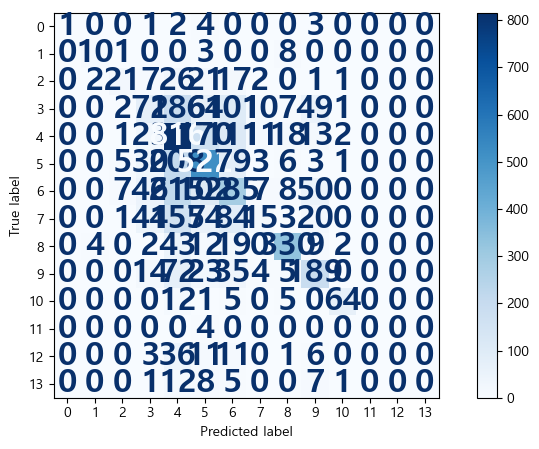


[변수 중요도]


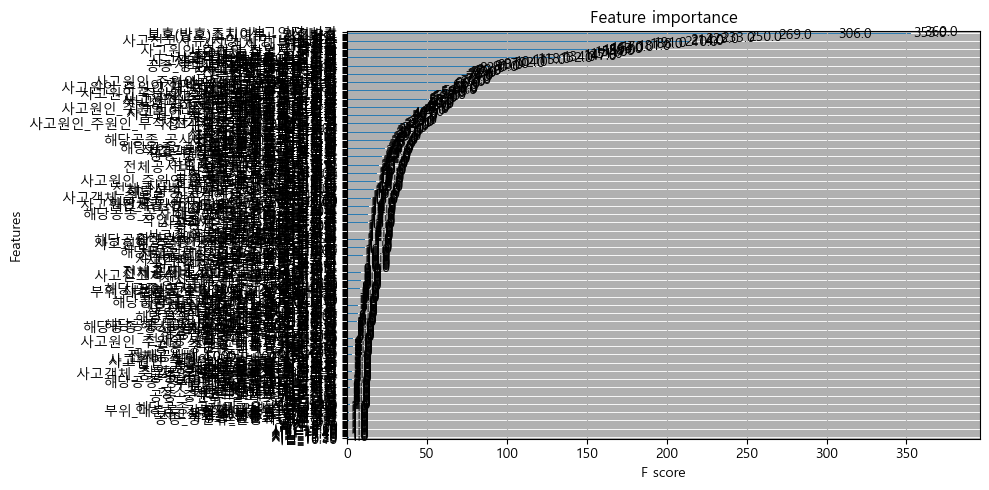

+------------------------------------------------+---------+-------------+-----------+
|                                                |   score |        rate |    cumsum |
|------------------------------------------------+---------+-------------+-----------|
| 사고인지 시간                                  |     360 |   0.0318274 | 0.0318274 |
| 보호(방호)조치여부 - 안전방호                  |     353 |   0.0312086 |  0.063036 |
| 기온.1                                         |     306 |   0.0270533 | 0.0900893 |
| 보호(방호)조치여부 - 개인방호                  |     269 |   0.0237822 |  0.113871 |
| 시정                                           |     250 |   0.0221024 |  0.135974 |
| 현지기압                                       |     233 |   0.0205994 |  0.156573 |
| 사고신고사유_사망_사망 내용 없음               |     223 |   0.0197153 |  0.176289 |
| 작업자수                                       |     214 |   0.0189196 |  0.195208 |
| 습도.1                                         |     214 |   0.0189196 |  0.214128 |
| 사고객체_대분류_기타 

KeyboardInterrupt: 

In [ ]:
my_xgb_classification(x_train,y_train,x_test,y_test, pr=False,roc=False,hist=False,learning_curve=False)